In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\justi\AppData\Local\Temp\ipykernel_13184\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = dataset.copy()

Data column explanation:
- **customerID** - Customer ID
- **gender** - Whether the customer is a male or a female
- **SeniorCitizen** - Whether the customer is a senior citizen or not (1, 0)
- **Partner** - Whether the customer has a partner or not (Yes, No)
- **Dependents** - Whether the customer has dependents or not (Yes, No)
- **tenure** - Number of months the customer has stayed with the company
- **PhoneService** - Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** - Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** - Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** - Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** - Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** - Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** - Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** - Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** - Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** - The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** - Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** - The amount charged to the customer monthly
- **TotalCharges** - The total amount charged to the customer
- **Churn** - Whether the customer churned or not (Yes or No) - TARGET VARIABLE

In [3]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(data.dtypes.value_counts())
print(data.info())

object     18
int64       2
float64     1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          704

In [6]:
# Let"s see the data types if there are any issues
print(data.select_dtypes(include=["int"]).columns)
print(data.select_dtypes(include=["float"]).columns)
print(data.select_dtypes(include=["object"]).columns)

Index(['SeniorCitizen', 'tenure'], dtype='object')
Index(['MonthlyCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [7]:
# describe the number columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Looks like "TotalCharges" should be numerical value, not categorical. Needs to be fixed.
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

#check isnull for the TotalCharges column
print(data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# Replace null with 0 for TotalCharges, assuming that the customer has never been charged before
# Looks like the tenure is 0 for the customers with null TotalCharges, meaning that uncharged customers are new customers that have not been charged yet.
print(data[data["tenure"].isin([0])].index)
print(data[data["TotalCharges"].isna()].index)

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [10]:
# Therefore, we can replace the null values in TotalCharges with 0
data.loc[:,"TotalCharges"] = data.loc[:,"TotalCharges"].replace(np.nan,0)
data["TotalCharges"].isnull().sum()

0

In [11]:
# Also senioCitizen seems to be int in the data but it should be an object, so needs replacing
print(data["SeniorCitizen"].value_counts())

# Replace 1 with Yes and 0 with No
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [12]:
# final check for dtypes
print(data.select_dtypes(include=["int"]).columns)
print(data.select_dtypes(include=["float"]).columns)
print(data.select_dtypes(include=["object"]).columns)

Index(['tenure'], dtype='object')
Index(['MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


Text(0.5, 1.0, 'Customer Churn Percentage')

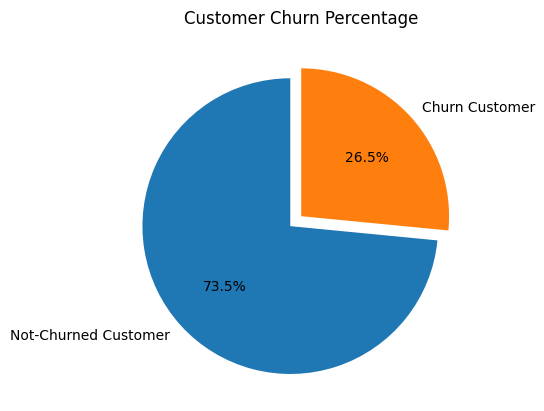

In [13]:
# quick view at the "final" dataset
fig = plt.subplots(nrows = 1,ncols = 1)

plt.pie(x=data["Churn"].value_counts()/data["Churn"].value_counts().sum(),labels = ["Not-Churned Customer","Churn Customer"],
        autopct = "%1.1f%%",startangle = 90,explode = (0.1,0))
plt.title("Customer Churn Percentage")

Quick remarks:
- Data seems to be unbalanced, there are significantly more not-churned customers in the dataset compared to churned ones.
- This can create inaccuracies when predicting customers, who can leave the company.
- The issue should be fixed either by oversampling (giving churned customers more samples) or undersampling (cutting down not-churned customers data).

In [15]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [16]:
# drop customerID
data.drop(columns = ["customerID"], inplace = True)

##### Demographic analysis  

Let's look at demographic data to look for patterns.

In [17]:
# Let's sort out demographic columns
demo_cols = ["gender","SeniorCitizen","Partner","Dependents"]

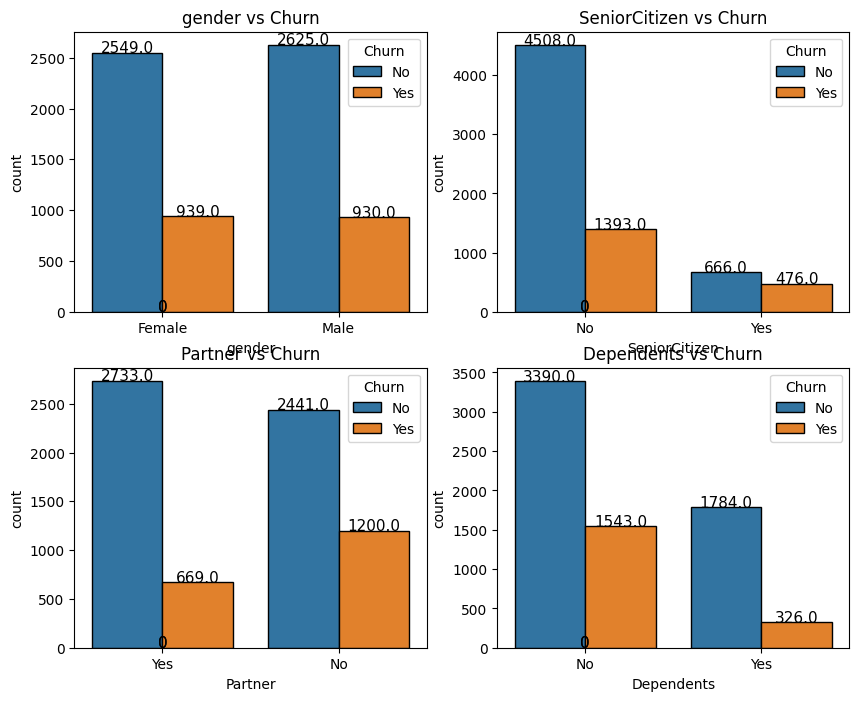

In [18]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,8))
for col in range(len(demo_cols)):
    plt.subplot(2,2,col+1)
    ax = sns.countplot(x = demo_cols[col],data = data,hue = "Churn",edgecolor = "black")
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment="center", fontsize = 11)
    title = demo_cols[col] + " vs Churn"
    plt.title(title)

Quick remarks
- There seems not to be any gender-related evidence of customer churn - men leave the company as much as women.
- Senior citizens seem to be less loyal to the company and tend to leave more often.
- Single customers (customers who don't have a partner) seem to be less loyal (is it because they are young customers, which are more price sensitive?)
- Customers who don't have dependents are less loyal (is it because they are young customers?)

##### Subscription analysis

In [19]:
# Let"s sort out subscription-related columns
subsc_cols = ["PhoneService","MultipleLines","InternetService","StreamingTV","StreamingMovies",
      "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","Contract","PaperlessBilling","PaymentMethod"]

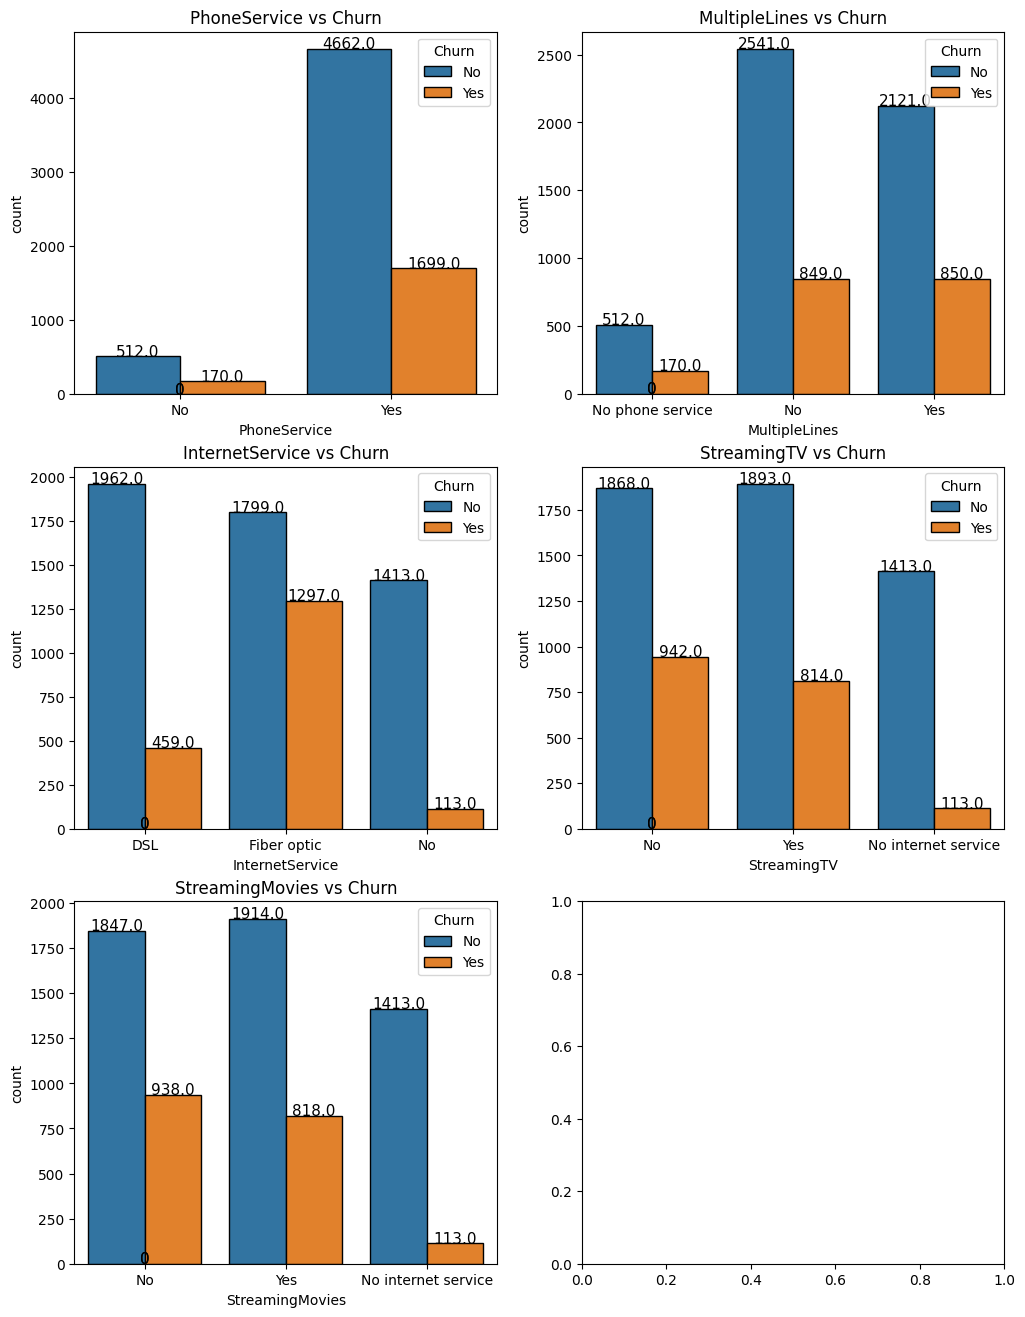

In [20]:
# Services analysis
# key services:
services_key_cols = ["PhoneService","MultipleLines","InternetService","StreamingTV","StreamingMovies"]
fig = plt.subplots(nrows = 3,ncols = 2,figsize = (12,16))
for col in range(len(services_key_cols)):
    plt.subplot(3,2,col+1)
    ax = sns.countplot(x = services_key_cols[col],data = data,hue = "Churn",edgecolor = "black")
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment="center", fontsize = 11)
    title = services_key_cols[col] + " vs Churn"
    plt.title(title)

Quick remarks
- Customer churn seems to be higher in phone services segment. It is logical since it is more vibrant segment and customers are freer to leave it compared to line services.
- Customers seem to be more loyal if they subscribe to several telecommunications services, such as home services + mobile telecommunications.
- Huge churn detected among consumers who subscribe to fibre optic internet. Is telco's fibre bad or are competitors offering better packages/quality?
- Streaming services don't seem to have a huge impact on churn levels.

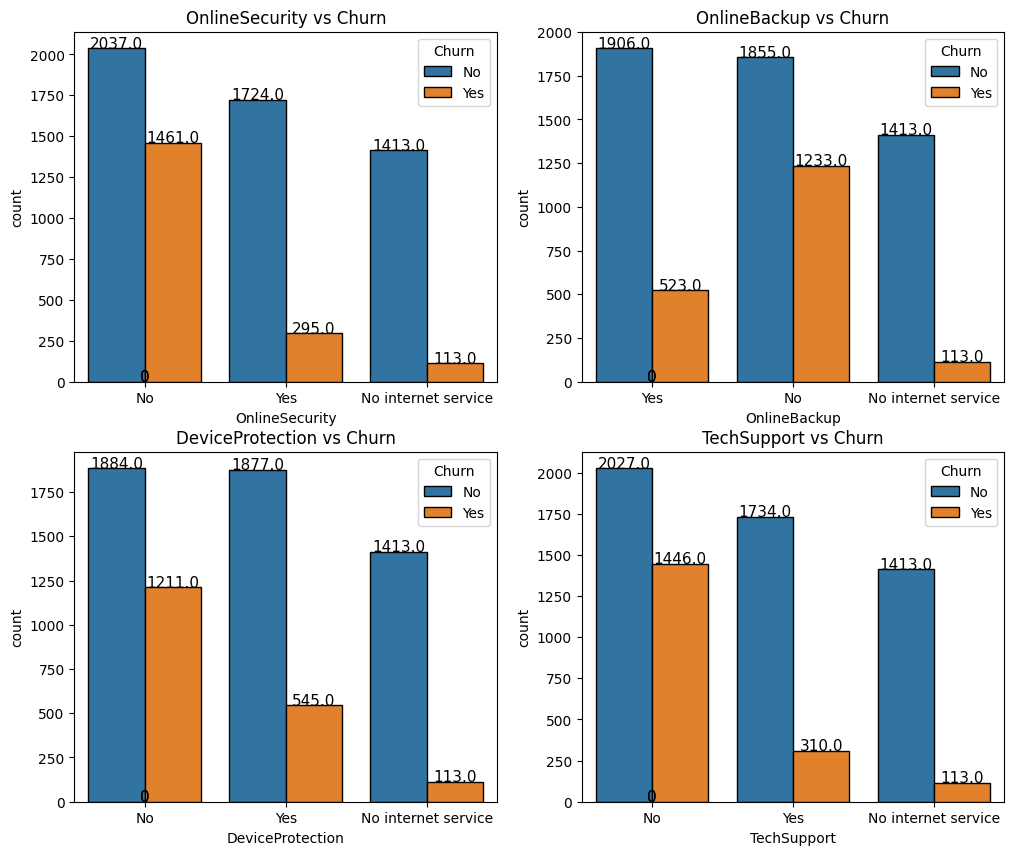

In [24]:
#auxiliary services
services_aux_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport"]
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (12,10))
for col in range(len(services_aux_cols)):
    plt.subplot(2,2,col+1)
    ax = sns.countplot(x = services_aux_cols[col],data = data,hue = "Churn",edgecolor = "black")
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment="center", fontsize = 11)
    title = services_aux_cols[col] + " vs Churn"
    plt.title(title)

Quick remarks
- Online security is a highly sought addition to mainstream services, giving rising threats around the world.
- Online backup is also an important attribute to customers amid rising data storage needs and growing cloud services popularity.
- Device protection is an important addition to mobile services, thus customers apprecaite having it.
- Tech support, either person-to-person or person-to-AI is expecially important as it gives customers assurance of quick problem fixing. This auxiliary service seems to have a significant effect on churn levels.
- Overall, it seems that providing all the afforementioned auxiliary customer support services can strongly reduce customer churn.

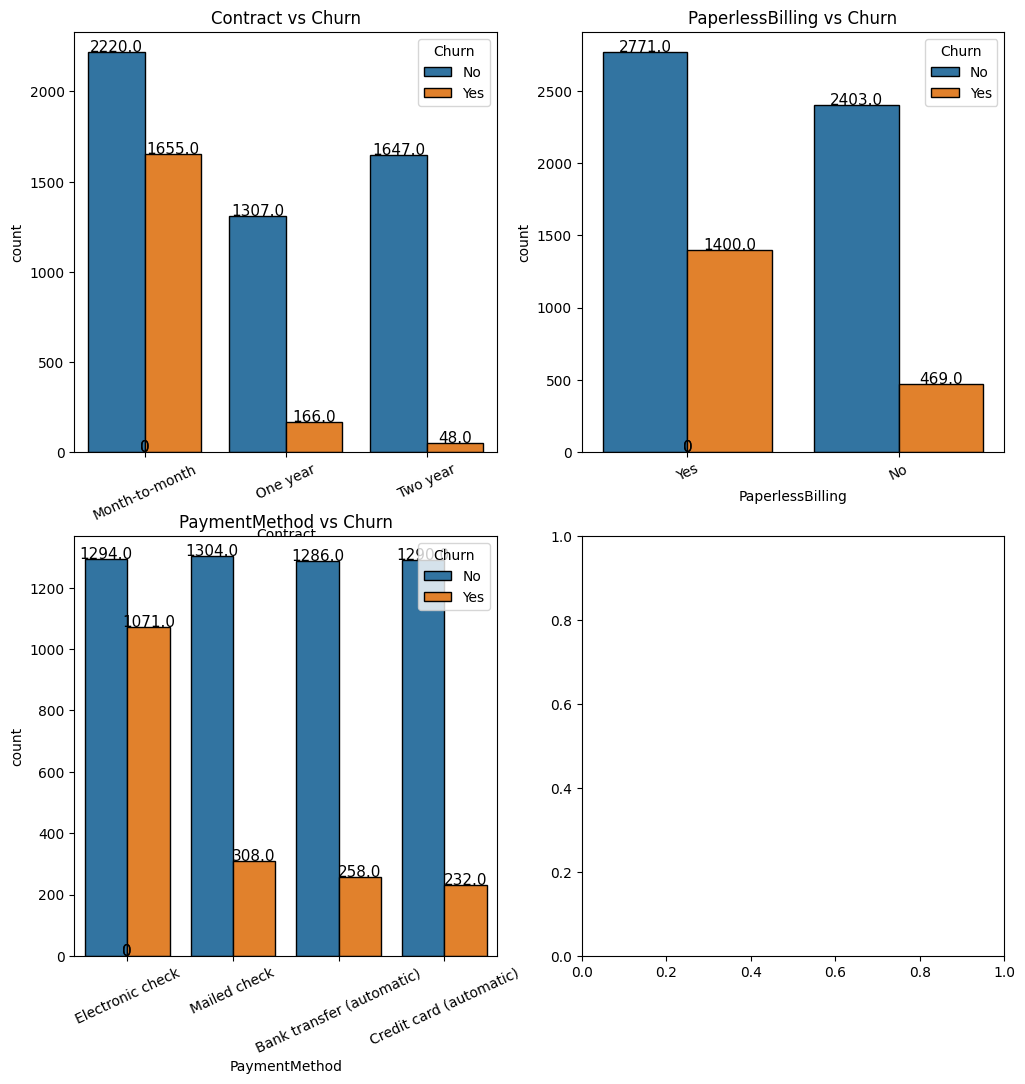

In [26]:
# Payment analysis
payment_cols = [ "Contract","PaperlessBilling","PaymentMethod"]
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (12,12))
for col in range(len(payment_cols)):
    plt.subplot(2,2,col+1)
    ax = sns.countplot(x = payment_cols[col],data = data,hue = "Churn",edgecolor = "black")
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment="center", fontsize = 11)
    title = payment_cols[col] + " vs Churn"
    plt.xticks(rotation=25)
    plt.title(title)

Quick remarks
- As expected customer churn is significantly smaller among contracted customers. Customers are tied to provider for at least a year, thus there is a longer period of time to fix emerged customer concerns. Also demand by month-to-month customers is more price-elastic, thus price competition, among with other types of rivarly, is higher between telcos.
- Customers who use paperless billing are less loyal. This can be attributed to lower customer engagement with the company and poorer connection with services/brand, etc.
- Customers who paid over electronic check churned more as this was not an automatic process and customers had to pay mannually each month (was it convenient for customers to pay for telco's services?) Customers, especially those who were less assured of the telco's services, had a constant reminder to think whether they should continue with the subscriptions. Meanwhile, customers, who used automatic transfers, were more confident with services and worried less about subscribing to the services.


#### Numerical column analysis

C:\Users\justi\AppData\Local\Temp\ipykernel_13184\2306090124.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[col]])
C:\Users\justi\AppData\Local\Temp\ipykernel_13184\2306090124.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[col]])
C:\Users

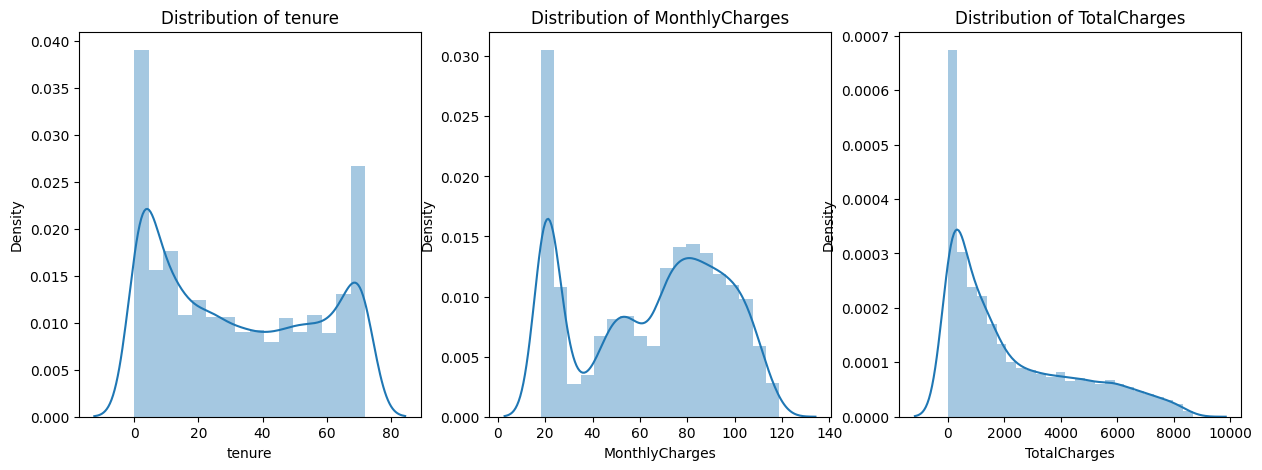

In [27]:
# Numerical columns
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for col in range(len(numerical_features)):
    plt.subplot(1,3,col+1)
    sns.distplot(data[numerical_features[col]])
    title = "Distribution of " + numerical_features[col]
    plt.title(title)
plt.show()

Quick remarks
- Customers, looking at tenure in months, seem to either stick long and very short with the company. There doesn't seem another anomalies when customers tend to leave after a certain time with the company (2 years, 4 years, etc.)
- Majority of customers pay very little per month, yet the most precious seem to be those paying 70+.
- TotalCharges shows a rightly skewed distribution, although this is normal as majority of customers had payed smaller ammounts, especially those who didn't stick long with the company.

Text(0.5, 1.0, 'tenure churn')

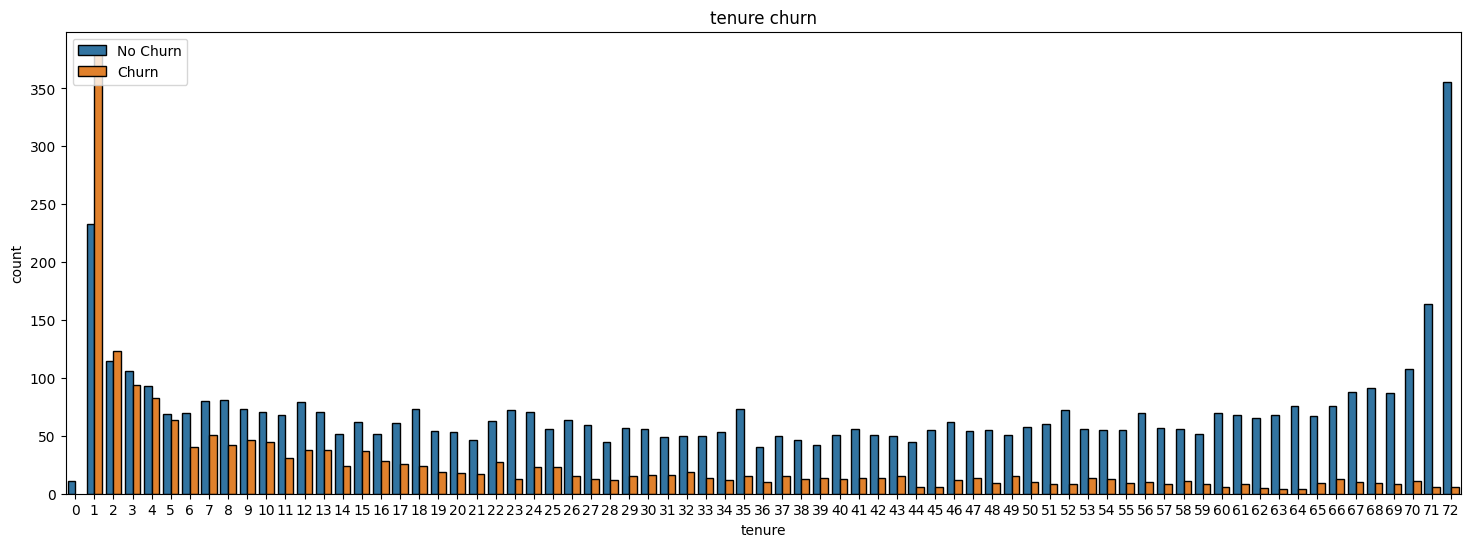

In [28]:
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (18,6))
plt.subplot(1,1,1)
sns.countplot(x = "tenure",data = data,hue = "Churn",edgecolor = "black")
plt.legend(["No Churn","Churn"],loc = "upper left")
title = "tenure churn"
plt.title(title)

Quick remarks
- Customers, who stay longer than a year, seem to leave the company less. The trust is built gradually and customers don't see much reasons for leaving the company.
- High churn is the a significant problem among customers who stay for a few months. Although it is logical as customers may just be testing services or using promotional offers to test services for free (if such are available).

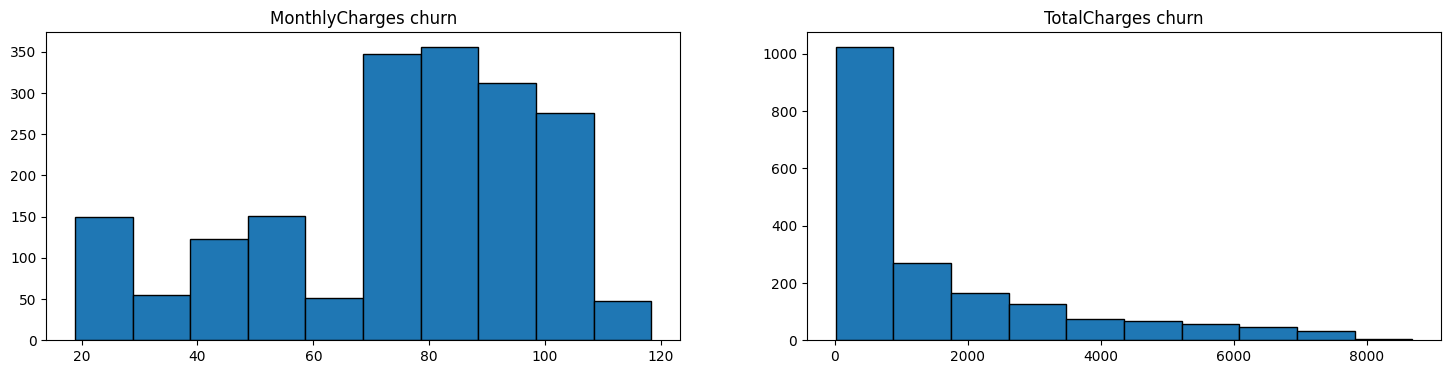

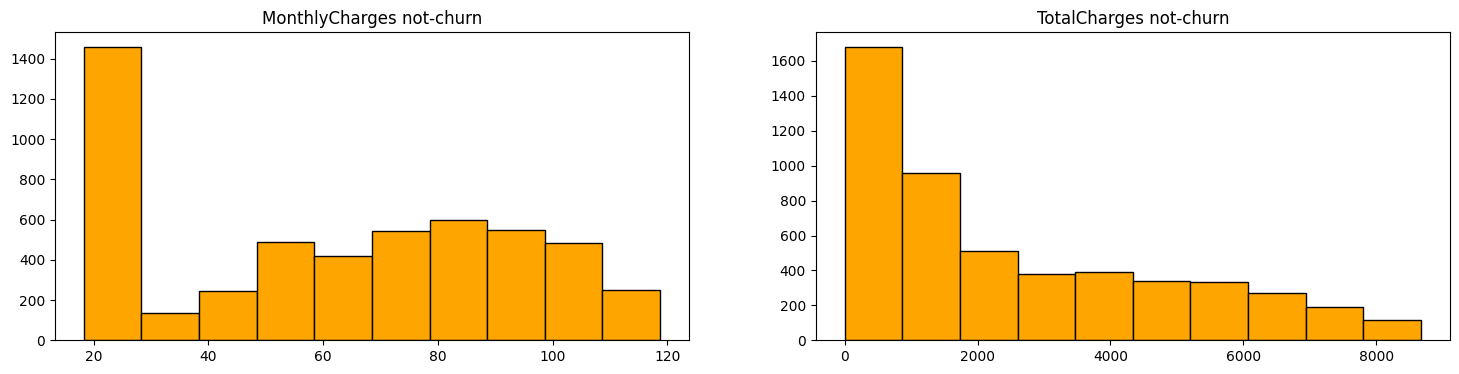

In [29]:
churn_data = data[data["Churn"] == "Yes"]
not_churn_data = data[data["Churn"] == "No"]

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (18,4))
for col in range(len(numerical_features[1:])):
    plt.subplot(1,2,col+1)
    plt.hist(churn_data[numerical_features[1 + col]], bins=10, edgecolor = "black", label="Churn")
    title = numerical_features[1 + col] + " churn"
    plt.title(title)

fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (18,4))
for col in range(len(numerical_features[1:])):
    plt.subplot(1,2,col+1)
    plt.hist(not_churn_data[numerical_features[1 + col]], bins=10, edgecolor = "black", color="orange", label="Not Churn")
    title = numerical_features[1 + col] + ' not-churn'
    plt.title(title)

Quick remarks
- There seems to be larger churn for customers who pay 70+ per month. This is a major revenue for the telcos and problems in this customer segment should be addresed.
- Churn for customers who pay little, although is increased for the most price-sensitive customers, overall is relatively small.
- Low paying customers are relatively loyal, although they typically don't bring much value for the company.